# Data Preprocessing

# 1. Import All Necessary Libraries and Create File Paths

In [38]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from osgeo import gdal, gdal_array
import sys
import cv2
import tqdm

In [39]:
# folder path or file path constants that will be used in this project
# Root Directory (between 'F:' or 'D:'' depends on the external drive)
ROOT = "D:\\"

# Folder inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_DATASET_FOLDER_PATH = os.path.join(ROOT, 'wildfire-sumatera-dataset')


# Folders and metadatas inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-geotiff')
WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image')
WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask')
WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask-tfrecords')

# Files (.csv) and metadatas inside D:\\wildfire-sumatera-dataset
METADATA_LANDSAT_8_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_landsat_8.csv')
METADATA_SENTINEL_2_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_sentinel_2.csv')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff
SENTINEL_2_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image
SENTINEL_2_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8
LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'prefire')
LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\sentinel-2
SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'prefire')
SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image-mask
SENTINEL_2_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'landsat-8')

# Folders inside
SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'landsat-8')

dirs = [
    WILDFIRE_SUMATERA_DATASET_FOLDER_PATH,
    WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 
    WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    
    SENTINEL_2_GEOTIFF_FOLDER_PATH, 
    LANDSAT_8_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_IMAGE_FOLDER_PATH,
    LANDSAT_8_IMAGE_FOLDER_PATH,
    
    LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH,
    LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH,
]

for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
        print(f"{dir_} has been created")
    else:
        print(f"{dir_} already exist")

D:\wildfire-sumatera-dataset already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask-tfrecords already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist
D

# 2. Access The Dataset
The dataset name is **data-total.csv** which contains all the necessary information about dates and location coordinates of a wildfire events in Indonesia.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

wf_data  = pd.read_csv("data-total.csv")
wf_data.columns

# rename columns
wf_data.rename(
    columns={
        'Lat': 'lat', 
        'Long': 'long', 
        'Satellite': 'satellite', 
        'Time_UTC': 'time_utc', 
        'Date': 'date', 
        'Source': 'source', 
        'PROVINSI': 'provinsi',
        'KAB_KOTA': 'kab_kota'
        }, 
    inplace=True,
    )

# adding '-' to date column values
wf_data.date = pd.to_datetime(wf_data.date, format="%Y%m%d")
wf_data.date = wf_data.date.astype('string')

# All provinces in sumatera
sumatera_provinces = [
    'SUMATERA UTARA',
    'JAMBI',
    'RIAU',
    'SUMATERA BARAT',
    'SUMATERA SELATAN',
    'BENGKULU',
    'LAMPUNG',
    'ACEH',
    ]

# create filter so that only events in sumatera will be returned.
sumatera_filter = wf_data['provinsi'].apply(lambda x: x in sumatera_provinces) 
sumatera_only = wf_data.loc[sumatera_filter]

display(sumatera_only.info())
display(sumatera_only.provinsi.unique())
display(sumatera_only.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7839 entries, 1 to 39670
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        7839 non-null   float64
 1   long       7839 non-null   float64
 2   satellite  7839 non-null   object 
 3   time_utc   7839 non-null   object 
 4   date       7839 non-null   string 
 5   source     7839 non-null   object 
 6   provinsi   7839 non-null   object 
 7   kab_kota   7839 non-null   object 
 8   kec2006    7830 non-null   object 
 9   desaa2006  7830 non-null   object 
 10  nama_kaw   930 non-null    object 
dtypes: float64(2), object(8), string(1)
memory usage: 734.9+ KB


None

array(['LAMPUNG', 'RIAU', 'SUMATERA UTARA', 'SUMATERA BARAT',
       'SUMATERA SELATAN', 'ACEH', 'JAMBI', 'BENGKULU'], dtype=object)

lat     long satellite     time_utc        date source        provinsi  \
1 -5.06259  105.101   LPN-NPP  06:11:04 AM  2016-08-24  LAPAN         LAMPUNG   
4  1.18991  100.672   LPN-NPP  06:29:59 AM  2016-08-23  LAPAN            RIAU   
5  2.31418  100.288   LPN-NPP  06:29:59 AM  2016-08-23  LAPAN  SUMATERA UTARA   
6  1.41833  100.752   LPN-NPP  06:29:59 AM  2016-08-23  LAPAN            RIAU   
8  1.38958  100.673   LPN-NPP  06:36:36 AM  2016-09-13  LAPAN            RIAU   

         kab_kota              kec2006              desaa2006 nama_kaw  
1  LAMPUNG TENGAH            ANAK TUHA              BUMI JAYA      NaN  
4      ROKAN HULU  KECAMATAN KAPENUHAN  UPT SP IV KOTO TENGAH      NaN  
5     LABUHANBATU         PANAI TENGAH           SELAT BETING      NaN  
6     ROKAN HILIR      KECAMATAN PUJUD          SIARANG ARANG      NaN  
8     ROKAN HILIR      KECAMATAN PUJUD           TELUK NAYANG      NaN

In [5]:
# sort the data in based on 'date' column in ascending order
sumatera_only = sumatera_only.sort_values(
    by=['date'], 
    ascending=True,
    ignore_index=True,
)

sumatera_only.head()

lat      long satellite     time_utc        date source provinsi  \
0  1.64968  100.8920   LPN-NPP  06:24:35 AM  2016-04-12  LAPAN     RIAU   
1  1.64853  100.8840   LPN-NPP  06:24:35 AM  2016-04-12  LAPAN     RIAU   
2  1.58003  100.8550   LPN-NPP  06:24:35 AM  2016-04-12  LAPAN     RIAU   
3  4.27236   97.7478   LPN-NPP  06:24:35 AM  2016-04-12  LAPAN     ACEH   
4  1.65664  100.8910   LPN-NPP  06:24:35 AM  2016-04-12  LAPAN     RIAU   

       kab_kota                  kec2006       desaa2006 nama_kaw  
0   ROKAN HILIR  KECAMATAN BANGKO PUSAKO  SUNGAI MENASIB      NaN  
1   ROKAN HILIR  KECAMATAN BANGKO PUSAKO  SUNGAI MENASIB      NaN  
2   ROKAN HILIR    KECAMATAN TANAH PUTIH  BALAM SEMPURNA      NaN  
3  ACEH TAMIANG             TAMIANG HULU   BATU BEDULANG      NaN  
4   ROKAN HILIR  KECAMATAN BANGKO PUSAKO  SUNGAI MENASIB      NaN

# 3. Create All Functions for the Project and Constants

In [6]:
def get_img_as_array(filepath, dictionary):
    """
    :param filepath: location of the satellite bands
    :param dictionary: information about the image bands
    :return: dictionary containing name of the satellite bands as key and array of pixels as value  
    """
    os.chdir(filepath)
    print(filepath)
    band_imgs = {}
    for key, val in dictionary.items():
        # open the .tiff file
        if os.path.exists(filepath):
            tiff_file = gdal.Open(key)
            bands = key.split('_')
            for i, band in enumerate(bands):
                band_imgs[band] = tiff_file.GetRasterBand(i+1).ReadAsArray()
    
    return band_imgs

In [7]:
def save_satellite_image(bands=[], file_path=""):
    """
    :param bands: array of satellite image bands
    :param filepath: location of the image being stored
    :return: return result of the conversion (True which is 'success' or False which is 'failed') 
    """
    if not bands:
        print("bands cannot be empty")
        return 
    
    if not file_path:
        print("filename cannot be empty")
        return
    img = cv2.merge(bands)
    img *= 255
    cv2.imwrite(file_path, img)
    return True

In [8]:
LANDSAT_POSTFIRE_DICT = {
    'dnbr_b7': 2,
    'b5_b4': 2,
    'b3_b2': 2
}

SENTINEL_POSTFIRE_DICT = {
    'dnbr_b12': 2,
    'b8_b4': 2,
    'b3_b2': 2
}

# 4. Open Landsat CSV File

In [9]:
PNG_EXT = '.png'
landsat_df = pd.read_csv(METADATA_LANDSAT_8_FILE_PATH)
landsat_df.head()

folder_paths_geotiff  mean_dnbr  median_dnbr  \
0  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.118657     0.092437   
1  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.118892     0.092641   
2  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.124600     0.095925   
3  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.099432     0.074912   
4  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.118605     0.092377   

   class_by_mean  class_by_median  
0              0                0  
1              0                0  
2              0                0  
3              0                0  
4              0                0

## 4.1 Check Image Condition From All Bands
Filter to check whether all of the array forms of each bands is not **None** or **empty**

In [11]:
landsat_image_condition = []
for index, row in landsat_df.iterrows():
    # open the image path
    condition = 1
    landsat_postfire_img_band = get_img_as_array(
        os.path.join(ROOT, row['folder_paths_geotiff']), 
        LANDSAT_POSTFIRE_DICT,
    )
    defect = [val is None for key, val in landsat_postfire_img_band.items()]            
    if np.sum(defect) > 0:
        condition=0
        print("defect detected")
    landsat_image_condition.append(condition)

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\0
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\8
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\9
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\10
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\11
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\12
D:\wildfi

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\108
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\109
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\110
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\111
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\112
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\113
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\114
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\115
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\116
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\117
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\118
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\119
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\214
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\215
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\216
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\217
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\218
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\219
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\220
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\221
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\222
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\223
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\224
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\225
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\321
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\322
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\323
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\324
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\325
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\326
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\327
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\328
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\329
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\330
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\331
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\332
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\427
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\428
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\429
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\430
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\431
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\432
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\433
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\434
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\435
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\436
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\437
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\438
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\534
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\535
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\536
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\537
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\538
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\539
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\540
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\541
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\542
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\543
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\544
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\545
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\640
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\641
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\642
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\643
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\644
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\645
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\646
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\647
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\648
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\649
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\650
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\651
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\747
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\748
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\749
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\750
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\751
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\752
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\753
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\754
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\755
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\756
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\757
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\758
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\853
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\854
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\855
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\856
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\857
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\858
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\859
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\860
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\861
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\862
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\863
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\864
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\959
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\960
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\961
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\962
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\963
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\964
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\965
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\966
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\967
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\968
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\969
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\970
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1064
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1065
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1066
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1067
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1068
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1069
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1070
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1071
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1072
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1073
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1074
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1075
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1169
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1170
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1171
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1172
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1173
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1174
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1175
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1176
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1177
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1178
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1179
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1180
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1274
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1275
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1276
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1277
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1278
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1279
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1280
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1281
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1282
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1283
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1284
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1285
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1378
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1379
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1380
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1381
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1382
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1383
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1384
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1385
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1386
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1387
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1388
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1389
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1482
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1483
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1484
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1485
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1486
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1487
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1488
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1489
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1490
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1491
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1492
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1493
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1586
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1587
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1588
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1589
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1590
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1591
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1592
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1593
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1594
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1595
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1596
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1597
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1692
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1693
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1694
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1695
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1696
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1697
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1698
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1699
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1700
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1701
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1702
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1703
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1796
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1797
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1798
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1799
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1800
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1801
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1802
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1803
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1804
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1805
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1806
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1807
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1900
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1901
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1902
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1903
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1904
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1905
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1906
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1907
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1908
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1909
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1910
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1911
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2006
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2007
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2008
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2009
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2010
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2011
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2012
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2013
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2014
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2015
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2016
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2017
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2112
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2113
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2114
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2115
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2116
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2117
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2118
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2119
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2120
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2121
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2122
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2123
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2217
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2218
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2219
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2220
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2221
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2222
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2223
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2224
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2225
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2226
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2227
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2228
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2322
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2323
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2324
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2325
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2326
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2327
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2328
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2329
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2330
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2331
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2332
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2333
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2427
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2428
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2429
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2430
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2431
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2432
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2433
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2434
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2435
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2436
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2437
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2438
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2532
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2533
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2534
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2535
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2536
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2537
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2538
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2539
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2540
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2541
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2542
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2543
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2636
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2637
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2638
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2639
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2640
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2641
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2642
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2643
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2644
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2645
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2646
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2647
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2740
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2741
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2742
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2743
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2744
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2745
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2746
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2747
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2748
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2749
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2750
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2751
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2845
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2846
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2847
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2848
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2849
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2850
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2851
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2852
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2853
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2854
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2855
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2856
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2950
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2951
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2952
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2953
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2954
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2955
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2956
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2957
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2958
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2959
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2960
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2961
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3055
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3056
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3057
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3058
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3059
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3060
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3061
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3062
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3063
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3064
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3065
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3066
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3161
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3162
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3163
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3164
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3165
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3166
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3167
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3168
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3169
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3170
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3171
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3172
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3266
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3267
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3268
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3269
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3270
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3271
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3272
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3273
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3274
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3275
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3276
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3277
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3370
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3371
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3372
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3373
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3374
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3375
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3376
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3377
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3378
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3379
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3380
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3381
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3475
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3476
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3477
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3478
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3479
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3480
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3481
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3482
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3483
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3484
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3485
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3486
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3580
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3581
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3582
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3583
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3584
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3585
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3586
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3587
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3588
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3589
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3590
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3591
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3685
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3686
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3687
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3688
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3689
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3690
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3691
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3692
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3693
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3694
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3695
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3696
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3789
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3790
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3791
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3792
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3793
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3794
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3795
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3796
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3797
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3798
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3799
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3800
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3893
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3894
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3895
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3896
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3897
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3898
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3899
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3900
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3901
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3902
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3903
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3904
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3998
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3999
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4000
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4001
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4002
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4003
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4004
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4005
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4006
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4007
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4008
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4009
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4102
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4103
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4104
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4105
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4106
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4107
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4108
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4109
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4110
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4111
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4112
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4113
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4207
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4208
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4209
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4210
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4211
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4212
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4213
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4214
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4215
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4216
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4217
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4218
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4313
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4314
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4315
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4316
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4317
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4318
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4319
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4320
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4321
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4322
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4323
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4324
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4419
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4420
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4421
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4422
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4423
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4424
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4425
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4426
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4427
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4428
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4429
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4430
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4525
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4526
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4527
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4528
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4529
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4530
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4531
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4532
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4533
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4534
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4535
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4536
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4630
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4631
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4632
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4633
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4634
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4635
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4636
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4637
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4638
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4639
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4640
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4641
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4736
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4737
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4738
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4739
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4740
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4741
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4742
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4743
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4744
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4745
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4746
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4747
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4840
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4841
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4842
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4843
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4844
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4845
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4846
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4847
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4848
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4849
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4850
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4851
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4946
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4947
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4948
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4949
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4950
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4951
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4952
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4953
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4954
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4955
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4956
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4957
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5051
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5052
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5053
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5054
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5055
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5056
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5057
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5058
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5059
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5060
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5061
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5062
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5157
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5158
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5159
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5160
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5161
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5162
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5163
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5164
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5165
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5166
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5167
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5168
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5263
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5264
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5265
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5266
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5267
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5268
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5269
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5270
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5271
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5272
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5273
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5274
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5369
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5370
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5371
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5372
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5373
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5374
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5375
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5376
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5377
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5378
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5379
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5380
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5474
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5475
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5476
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5477
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5478
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5479
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5480
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5481
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5482
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5483
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5484
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5485
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5580
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5581
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5582
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5583
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5584
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5585
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5586
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5587
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5588
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5589
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5590
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5591
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5685
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5686
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5687
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5688
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5689
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5690
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5691
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5692
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5693
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5694
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5695
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5696
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5790
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5791
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5792
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5793
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5794
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5795
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5796
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5797
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5798
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5799
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5800
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5801
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5895
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5896
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5897
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5898
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5899
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5900
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5901
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5902
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5903
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5904
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5905
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5906
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6000
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6001
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6002
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6003
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6004
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6005
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6006
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6007
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6008
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6009
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6010
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6011
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6104
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6105
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6106
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6107
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6108
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6109
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6110
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6111
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6112
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6113
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6114
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6115
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6210
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6211
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6212
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6213
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6214
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6215
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6216
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6217
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6218
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6219
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6220
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6221
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6316
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6317
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6318
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6319
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6320
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6321
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6322
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6323
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6324
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6325
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6326
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6327
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6421
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6422
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6423
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6424
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6425
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6426
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6427
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6428
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6429
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6430
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6431
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6432
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6526
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6527
defect detected
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6528
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6529
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6530
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6531
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6532
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6533
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6534
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6535
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6536
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6537
D:\wildfire-sumatera-dataset\wildfir

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6630
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6631
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6632
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6633
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6634
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6635
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6636
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6637
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6638
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6639
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6640
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6641
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6736
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6737
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6738
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6739
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6740
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6741
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6742
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6743
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6744
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6745
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6746
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6747
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6840
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6841
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6842
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6843
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6844
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6845
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6846
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6847
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6848
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6849
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6850
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6851
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6944
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6945
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6946
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6947
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6948
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6949
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6950
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6951
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6952
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6953
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6954
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6955
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7049
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7050
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7051
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7052
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7053
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7054
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7055
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7056
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7057
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7058
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7059
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7060
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7153
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7154
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7155
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7156
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7157
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7158
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7159
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7160
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7161
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7162
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7163
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7164
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7257
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7258
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7259
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7260
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7261
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7262
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7263
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7264
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7265
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7266
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7267
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7268
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7361
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7362
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7363
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7364
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7365
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7366
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7367
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7368
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7369
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7370
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7371
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7372
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7466
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7467
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7468
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7469
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7470
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7471
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7472
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7473
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7474
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7475
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7476
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7477
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7572
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7573
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7574
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7575
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7576
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7577
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7578
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7579
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7580
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7581
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7582
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7583
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7676
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7677
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7678
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7679
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7680
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7681
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7682
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7683
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7684
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7685
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7686
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7687
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7780
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7781
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7782
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7783
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7784
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7785
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7786
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7787
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7788
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7789
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7790
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7791
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

In [29]:
landsat_df['image_condition'] = landsat_image_condition
landsat_df.to_csv(METADATA_LANDSAT_8_FILE_PATH, index=False)

## 4.2 Binarized Image
Save a file containing real images with their masks

In [41]:
for index, row in landsat_df.iterrows():
    print(row['folder_paths_geotiff'])
    if row['image_condition']:
        # create directory path
        directory = os.path.join(LANDSAT_8_IMAGE_MASK_FOLDER_PATH, str(index))
        print(directory)

        # check if the directory already exists
        if not os.path.exists(directory):
            os.mkdir(directory)
            print("{} has been created".format(directory))
        else:
            print("{} already exist".format(directory))
        
        # check if the image.png and mask.png already exists
        image_path = os.path.join(directory, 'image.png')
        mask_path = os.path.join(directory, 'mask.png')
        if os.path.exists(image_path) and os.path.exists(mask_path):
            print("{} and {} already exist".format(image_path, mask_path))
            continue
            
        # open the image path
        landsat_postfire_img_band = get_img_as_array(
            os.path.join(ROOT, row['folder_paths_geotiff']), 
            LANDSAT_POSTFIRE_DICT,
        )
        mask_binary = np.array(landsat_postfire_img_band['dnbr'], dtype=np.float32)
        mask_binary = np.where(mask_binary<0.05, 0, 255)
        # save image
        save_satellite_image([
            landsat_postfire_img_band['b2'], 
            landsat_postfire_img_band['b3'],
            landsat_postfire_img_band['b4'],], 
            os.path.join(directory, image_path))
        # save mask
        cv2.imwrite(os.path.join(directory, mask_path), mask_binary)
    else:
        print('image is broke')

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\0
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\0
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\0 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\0\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\0\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2
D:\wildfire-sumatera-dataset\wildfire-sumatera

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\160 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\160\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\160\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\161
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\161
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\161 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\161\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\161\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\162
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\162
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\162 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\162\image.png an

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\320 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\320\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\320\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\321
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\321
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\321 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\321\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\321\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\322
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\322
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\322 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\322\image.png an

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\489 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\489\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\489\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\490
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\490
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\490 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\490\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\490\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\491
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\491
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\491 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\491\image.png an

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\644 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\644\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\644\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\645
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\645
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\645 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\645\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\645\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\646
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\646
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\646 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\646\image.png an

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\793 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\793\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\793\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\794
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\794
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\794 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\794\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\794\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\795
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\795
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\795 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\795\image.png an

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\934 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\934\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\934\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\935
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\935
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\935 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\935\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\935\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\936
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\936
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\936 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\936\image.png an

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1078 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1078\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1078\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1079
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1079
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1079 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1079\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1079\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1080
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1080
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1080 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1080\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1217\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1217\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1218
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1218
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1218 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1218\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1218\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1219
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1219
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1219 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1219\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1219\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1366\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1366\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1367
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1367
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1367 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1367\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1367\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1368
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1368
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1368 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1368\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1368\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1514 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1514\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1514\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1515
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1515
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1515 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1515\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1515\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1516
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1516
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1516 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1516\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1653 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1653\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1653\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1654
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1654
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1654 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1654\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1654\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1655
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1655
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1655 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1655\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1797 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1797\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1797\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1798
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1798
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1798 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1798\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1798\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1799
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1799
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1799 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1799\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1936\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1936\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1937
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1937
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1937 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1937\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1937\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1938
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1938
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1938 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1938\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\1938\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2069 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2069\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2069\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2070
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2070
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2070 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2070\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2070\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2071
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2071
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2071 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2071\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2197 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2197\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2197\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2198
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2198
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2198 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2198\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2198\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2199
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2199
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2199 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2199\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2308\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2308\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2309
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2309
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2309 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2309\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2309\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2310
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2310
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2310 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2310\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2310\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2440 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2440\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2440\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2441
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2441
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2441 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2441\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2441\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2442
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2442
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2442 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2442\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2557\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2557\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2558
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2558
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2558 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2558\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2558\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2559
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2559
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2559 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2559\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2559\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2674 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2674\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2674\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2675
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2675
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2675 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2675\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2675\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2676
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2676
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2676 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2676\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2838 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2838\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2838\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2839
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2839
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2839 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2839\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2839\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2840
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2840
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2840 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\2840\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3204 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3204\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3204\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3205
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3205
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3205 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3205\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3205\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3206
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3206
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3206 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3206\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3537 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3537\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3537\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3538
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3538
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3538 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3538\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3538\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3539
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3539
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3539 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3539\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3851 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3851\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3851\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3852
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3852
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3852 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3852\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3852\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3853
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3853
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3853 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3853\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4143\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4143\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4144
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4144
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4144 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4144\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4144\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4145
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4145
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4145 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4145\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4145\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4412\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4412\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4413
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4413
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4413 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4413\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4413\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4414
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4414
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4414 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4414\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4414\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4669\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4669\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4670
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4670
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4670 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4670\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4670\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4671
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4671
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4671 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4671\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4671\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4916\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4916\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4917
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4917
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4917 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4917\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4917\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4918
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4918
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4918 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4918\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4918\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5138\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5138\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5139
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5139
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5139 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5139\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5139\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5140
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5140
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5140 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5140\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5140\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5370\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5370\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5371
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5371
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5371 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5371\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5371\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5372
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5372
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5372 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5372\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5372\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5600\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5600\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5601
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5601
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5601 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5601\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5601\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5602
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5602
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5602 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5602\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5602\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5797 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5797\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5797\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5798
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5798
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5798 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5798\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5798\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5799
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5799
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5799 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5799\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5991\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5991\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5992
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5992
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5992 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5992\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5992\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5993
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5993
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5993 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5993\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5993\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6205\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6205\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6206
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6206
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6206 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6206\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6206\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6207
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6207
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6207 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6207\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6207\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6397 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6397\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6397\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6398
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6398
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6398 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6398\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6398\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6399
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6399
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6399 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6399\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6589 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6589\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6589\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6590
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6590
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6590 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6590\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6590\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6591
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6591
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6591 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6591\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6786\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6786\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6787
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6787
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6787 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6787\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6787\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6788
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6788
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6788 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6788\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6788\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6976 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6976\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6976\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6977
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6977
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6977 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6977\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6977\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6978
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6978
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6978 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6978\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7139 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7139\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7139\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7140
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7140
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7140 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7140\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7140\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7141
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7141
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7141 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7141\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7305 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7305\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7305\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7306
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7306
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7306 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7306\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7306\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7307
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7307
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7307 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7307\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7449 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7449\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7449\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7450
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7450
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7450 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7450\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7450\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7451
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7451
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7451 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7451\

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7603 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7603\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7603\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7604
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7604
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7604 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7604\image.png and D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7604\mask.png already exist
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7605
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7605
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7605 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7605\

Create a new column that contains the location of images with their masks

In [43]:
landsat_8_image_mask_folders = [os.path.join('\\', 'wildfire-sumatera-dataset', 'wildfire-sumatera-image-mask', 'landsat-8', str(i)) for i in range(len(landsat_df.index))]
landsat_df['folder_paths_image_mask'] = landsat_8_image_mask_folders
landsat_df.to_csv(METADATA_LANDSAT_8_FILE_PATH, index=False)

## 4.3 Clean Images by Area of Pixels and Save as PNG
small area of pixels will be removed to reduce noise

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\0


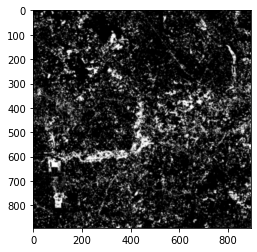

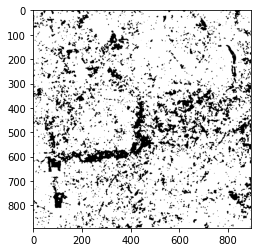

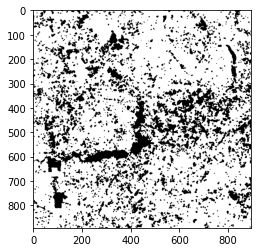

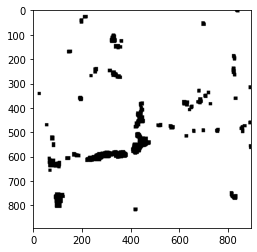

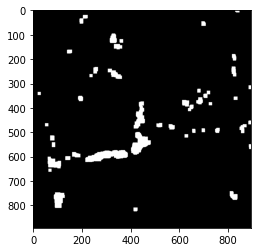

In [64]:
for index, row in landsat_df.iterrows():
    if row['image_condition']:
        # create directory path
        directory = os.path.join(ROOT, row['folder_paths_image_mask'])
        print(directory)
        
        # check if the image.png and mask.png already exists
        cleaned_mask_path = os.path.join(directory, 'cleaned_mask.png')
        if os.path.exists(cleaned_mask_path):
            print("{} already exist".format(cleaned_mask_path))
            continue
        
        image = cv2.imread(os.path.join(directory, 'mask.png'))

        # convert image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # apply GaussianBlur to the image
        blur = cv2.GaussianBlur(gray, (7, 7), 0)
        
        # create a binary representation of the image
        # thresholding means all pixels below T (threshold value) will be 0
        # else will be 255
        thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        
        # Filter using contour area and remove small noise
        cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        for c in cnts:
            area = cv2.contourArea(c)
            if area < 5500:
                cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

        # Morph close and invert image
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
        cleaned_mask = 255 - cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
        cv2.imwrite(os.path.join(directory, 'cleaned_mask{}'.format(PNG_EXT)), cleaned_mask)

# 5. Open Sentinel CSV File

In [13]:
PNG_EXT = '.png'
sentinel_df = pd.read_csv(METADATA_SENTINEL_2_FILE_PATH)
sentinel_df.head()

folder_paths_geotiff  mean_dnbr  median_dnbr  \
0  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.124348     0.098779   
1  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.124229     0.098487   
2  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.123137     0.096676   
3  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.141992     0.104607   
4  \wildfire-sumatera-dataset\wildfire-sumatera-g...   0.124485     0.098878   

   class_by_mean  class_by_median  image_condition  \
0              0                0                1   
1              0                0                1   
2              0                0                1   
3              0                0                1   
4              0                0                1   

                                     file_paths_jpeg  
0  \wildfire-sumatera-dataset\wildfire-sumatera-j...  
1  \wildfire-sumatera-dataset\wildfire-sumatera-j...  
2  \wildfire-sumatera-dataset\wildfire-sumatera-j...  
3  \wildfire-sumatera-dataset\wildfire-sumatera-j...  
4  \wildfire-sumatera-dataset\wildfire-sumatera-j...

## 5.1 Check Image Condition From All Bands
Filter to check whether all of the array forms of each bands is not **None** or **empty**

In [14]:
sentinel_image_condition = []
for index, row in sentinel_df.iterrows():
    # open the image path
    condition = 1
    sentinel_postfire_img_band = get_img_as_array(
        os.path.join(ROOT, row['folder_paths_geotiff']), 
        SENTINEL_POSTFIRE_DICT,
    )
    defect = [val is None for key, val in sentinel_postfire_img_band.items()]            
    if np.sum(defect) > 0:
        condition=0
        print("defect detected")
    sentinel_image_condition.append(condition)

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\0
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\8
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\9
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\10
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\11
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\105
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\106
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\107
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\108
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\109
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\110
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\111
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\112
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\113
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\114
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\115
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\116
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\209
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\210
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\211
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\212
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\213
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\214
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\215
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\216
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\217
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\218
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\219
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\220
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\314
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\315
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\316
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\317
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\318
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\319
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\320
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\321
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\322
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\323
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\324
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\325
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\418
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\419
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\420
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\421
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\422
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\423
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\424
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\425
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\426
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\427
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\428
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\429
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\523
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\524
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\525
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\526
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\527
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\528
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\529
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\530
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\531
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\532
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\533
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\534
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\627
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\628
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\629
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\630
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\631
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\632
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\633
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\634
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\635
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\636
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\637
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\638
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\732
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\733
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\734
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\735
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\736
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\737
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\738
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\739
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\740
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\741
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\742
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\743
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\837
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\838
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\839
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\840
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\841
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\842
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\843
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\844
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\845
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\846
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\847
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\848
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\941
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\942
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\943
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\944
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\945
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\946
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\947
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\948
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\949
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\950
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\951
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\952
D:\wildfire-sumatera-dataset\wildfire-sumatera-geoti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1045
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1046
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1047
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1048
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1049
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1050
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1051
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1052
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1053
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1054
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1055
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1056
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1148
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1149
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1150
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1151
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1152
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1153
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1154
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1155
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1156
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1157
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1158
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1159
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1251
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1252
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1253
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1254
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1255
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1256
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1257
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1258
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1259
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1260
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1261
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1262
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1355
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1356
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1357
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1358
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1359
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1360
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1361
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1362
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1363
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1364
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1365
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1366
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1458
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1459
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1460
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1461
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1462
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1463
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1464
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1465
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1466
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1467
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1468
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1469
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1561
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1562
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1563
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1564
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1565
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1566
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1567
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1568
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1569
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1570
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1571
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1572
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1665
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1666
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1667
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1668
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1669
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1670
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1671
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1672
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1673
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1674
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1675
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1676
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1768
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1769
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1770
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1771
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1772
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1773
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1774
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1775
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1776
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1777
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1778
defect detected
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1779
D:\wildfire-sumatera-dat

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1872
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1873
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1874
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1875
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1876
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1877
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1878
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1879
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1880
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1881
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1882
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1883
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1976
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1977
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1978
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1979
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1980
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1981
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1982
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1983
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1984
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1985
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1986
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1987
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2079
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2080
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2081
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2082
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2083
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2084
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2085
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2086
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2087
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2088
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2089
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2090
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2183
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2184
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2185
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2186
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2187
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2188
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2189
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2190
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2191
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2192
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2193
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2194
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2287
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2288
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2289
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2290
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2291
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2292
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2293
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2294
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2295
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2296
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2297
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2298
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2391
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2392
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2393
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2394
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2395
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2396
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2397
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2398
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2399
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2400
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2401
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2402
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2494
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2495
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2496
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2497
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2498
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2499
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2500
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2501
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2502
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2503
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2504
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2505
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2598
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2599
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2600
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2601
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2602
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2603
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2604
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2605
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2606
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2607
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2608
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2609
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2701
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2702
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2703
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2704
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2705
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2706
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2707
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2708
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2709
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2710
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2711
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2712
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2804
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2805
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2806
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2807
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2808
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2809
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2810
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2811
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2812
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2813
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2814
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2815
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2908
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2909
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2910
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2911
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2912
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2913
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2914
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2915
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2916
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2917
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2918
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2919
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3011
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3012
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3013
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3014
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3015
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3016
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3017
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3018
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3019
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3020
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3021
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3022
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3115
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3116
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3117
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3118
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3119
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3120
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3121
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3122
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3123
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3124
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3125
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3126
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3218
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3219
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3220
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3221
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3222
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3223
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3224
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3225
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3226
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3227
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3228
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3229
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3321
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3322
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3323
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3324
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3325
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3326
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3327
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3328
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3329
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3330
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3331
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3332
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3424
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3425
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3426
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3427
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3428
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3429
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3430
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3431
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3432
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3433
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3434
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3435
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3529
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3530
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3531
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3532
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3533
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3534
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3535
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3536
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3537
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3538
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3539
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3540
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3633
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3634
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3635
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3636
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3637
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3638
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3639
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3640
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3641
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3642
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3643
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3644
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3737
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3738
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3739
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3740
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3741
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3742
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3743
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3744
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3745
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3746
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3747
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3748
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3840
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3841
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3842
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3843
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3844
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3845
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3846
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3847
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3848
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3849
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3850
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3851
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3944
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3945
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3946
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3947
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3948
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3949
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3950
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3951
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3952
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3953
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3954
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3955
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4047
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4048
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4049
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4050
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4051
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4052
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4053
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4054
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4055
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4056
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4057
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4058
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4151
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4152
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4153
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4154
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4155
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4156
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4157
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4158
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4159
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4160
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4161
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4162
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4254
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4255
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4256
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4257
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4258
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4259
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4260
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4261
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4262
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4263
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4264
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4265
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4359
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4360
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4361
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4362
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4363
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4364
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4365
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4366
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4367
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4368
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4369
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4370
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4463
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4464
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4465
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4466
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4467
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4468
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4469
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4470
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4471
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4472
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4473
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4474
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4566
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4567
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4568
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4569
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4570
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4571
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4572
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4573
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4574
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4575
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4576
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4577
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4670
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4671
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4672
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4673
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4674
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4675
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4676
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4677
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4678
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4679
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4680
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4681
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4774
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4775
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4776
defect detected
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4777
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4778
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4779
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4780
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4781
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4782
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4783
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4784
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4785
D:\wildfire-sumatera-dat

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4879
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4880
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4881
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4882
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4883
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4884
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4885
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4886
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4887
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4888
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4889
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4890
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4983
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4984
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4985
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4986
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4987
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4988
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4989
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4990
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4991
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4992
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4993
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4994
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5086
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5087
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5088
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5089
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5090
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5091
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5092
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5093
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5094
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5095
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5096
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5097
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5191
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5192
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5193
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5194
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5195
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5196
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5197
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5198
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5199
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5200
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5201
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5202
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5296
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5297
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5298
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5299
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5300
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5301
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5302
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5303
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5304
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5305
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5306
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5307
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5399
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5400
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5401
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5402
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5403
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5404
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5405
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5406
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5407
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5408
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5409
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5410
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5504
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5505
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5506
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5507
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5508
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5509
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5510
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5511
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5512
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5513
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5514
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5515
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5607
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5608
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5609
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5610
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5611
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5612
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5613
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5614
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5615
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5616
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5617
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5618
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5710
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5711
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5712
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5713
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5714
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5715
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5716
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5717
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5718
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5719
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5720
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5721
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5815
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5816
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5817
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5818
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5819
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5820
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5821
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5822
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5823
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5824
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5825
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5826
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5920
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5921
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5922
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5923
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5924
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5925
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5926
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5927
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5928
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5929
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5930
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5931
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6023
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6024
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6025
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6026
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6027
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6028
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6029
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6030
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6031
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6032
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6033
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6034
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6127
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6128
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6129
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6130
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6131
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6132
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6133
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6134
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6135
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6136
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6137
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6138
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6232
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6233
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6234
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6235
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6236
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6237
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6238
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6239
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6240
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6241
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6242
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6243
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6336
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6337
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6338
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6339
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6340
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6341
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6342
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6343
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6344
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6345
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6346
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6347
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6440
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6441
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6442
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6443
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6444
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6445
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6446
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6447
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6448
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6449
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6450
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6451
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6543
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6544
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6545
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6546
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6547
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6548
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6549
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6550
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6551
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6552
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6553
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6554
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6646
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6647
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6648
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6649
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6650
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6651
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6652
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6653
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6654
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6655
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6656
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6657
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6750
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6751
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6752
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6753
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6754
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6755
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6756
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6757
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6758
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6759
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6760
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6761
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6853
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6854
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6855
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6856
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6857
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6858
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6859
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6860
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6861
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6862
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6863
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6864
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6957
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6958
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6959
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6960
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6961
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6962
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6963
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6964
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6965
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6966
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6967
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6968
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7062
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7063
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7064
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7065
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7066
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7067
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7068
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7069
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7070
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7071
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7072
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7073
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7166
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7167
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7168
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7169
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7170
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7171
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7172
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7173
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7174
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7175
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7176
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7177
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7270
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7271
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7272
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7273
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7274
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7275
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7276
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7277
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7278
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7279
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7280
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7281
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7375
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7376
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7377
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7378
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7379
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7380
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7381
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7382
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7383
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7384
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7385
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7386
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7479
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7480
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7481
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7482
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7483
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7484
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7485
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7486
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7487
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7488
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7489
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7490
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7582
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7583
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7584
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7585
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7586
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7587
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7588
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7589
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7590
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7591
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7592
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7593
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7687
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7688
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7689
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7690
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7691
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7692
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7693
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7694
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7695
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7696
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7697
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7698
D:\wildfire-sumatera-dataset\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7792
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7793
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7794
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7795
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7796
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7797
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7798
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7799
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7800
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7801
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7802
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7803
D:\wildfire-sumatera-dataset\wildfire-su

In [16]:
sentinel_df['image_condition'] = sentinel_image_condition
sentinel_df.to_csv(METADATA_SENTINEL_2_FILE_PATH, index=False)

## 5.2 Binarized Image
Save a file containing real images with their masks

In [17]:
for index, row in sentinel_df.iterrows():
    print(row['folder_paths_geotiff'])
    if row['image_condition']:
        # create directory path
        directory = os.path.join(SENTINEL_2_IMAGE_MASK_FOLDER_PATH, str(index))

        # check if the directory already exists
        if not os.path.exists(directory):
            os.mkdir(directory)
            print("{} has been created".format(directory))
        else:
            print("{} already exist".format(directory))

        # check if the image.png and mask.png already exists
        image_path = os.path.join(directory, 'image.png')
        mask_path = os.path.join(directory, 'mask.png')
        if os.path.exists(image_path) and os.path.exists(mask_path):
            print("{} and {} already exist".format(image_path, mask_path))
            continue

        # open the image path
        sentinel_postfire_img_band = get_img_as_array(
            os.path.join(ROOT, row['folder_paths_geotiff']), 
            SENTINEL_POSTFIRE_DICT,
        )
        mask_binary = np.array(sentinel_postfire_img_band['dnbr'], dtype=np.float32)
        mask_binary = np.where(mask_binary<0.05, 0, 255)        
        # save image
        save_satellite_image([
            sentinel_postfire_img_band['b2'], 
            sentinel_postfire_img_band['b3'],
            sentinel_postfire_img_band['b4'],], 
            os.path.join(directory, 'image{}'.format(PNG_EXT)))
        # save mask
        cv2.imwrite(os.path.join(directory, 'mask{}'.format(PNG_EXT)), mask_binary)
    else:
        print('image is broke')

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\0
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\0 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\0
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3
\wildfire-sumatera-dataset\wildfire-suma

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\34
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\34 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\34
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\35
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\35 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\35
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\36
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\36 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\36
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\37
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\37 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\37
\wildfire-sumatera-dataset\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\68
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\68 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\68
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\69
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\69 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\69
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\70
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\70 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\70
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\71
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\71 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\71
\wildfire-sumatera-dataset\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\103
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\103 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\103
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\104
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\104 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\104
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\105
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\105 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\105
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\106
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\106 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\106
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\137
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\137 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\137
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\138
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\138 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\138
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\139
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\139 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\139
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\140
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\140 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\140
\wildfire-sumate

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\171 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\171
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\172
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\172 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\172
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\173
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\173 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\173
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\174
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\174 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\174
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\175
D:\wildfire-suma

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\205
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\205 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\205
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\206
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\206 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\206
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\207
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\207 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\207
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\208
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\208 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\208
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\239
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\239 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\239
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\240
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\240 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\240
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\241
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\241 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\241
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\242
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\242 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\242
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\273
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\273 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\273
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\274
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\274 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\274
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\275
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\275 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\275
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\276
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\276 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\276
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\307
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\307 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\307
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\308
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\308 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\308
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\309
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\309 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\309
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\310
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\310 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\310
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\341
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\341 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\341
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\342
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\342 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\342
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\343
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\343 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\343
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\344
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\344 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\344
\wildfire-sumate

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\374 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\374
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\375
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\375 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\375
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\376
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\376 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\376
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\377
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\377 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\377
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\378
D:\wildfire-suma

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\408
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\408 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\408
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\409
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\409 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\409
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\410
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\410 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\410
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\411
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\411 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\411
\wildfire-sumate

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\442 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\442
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\443
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\443 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\443
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\444
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\444 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\444
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\445
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\445 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\445
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\446
D:\wildfire-suma

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\476
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\476 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\476
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\477
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\477 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\477
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\478
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\478 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\478
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\479
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\479 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\479
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\510
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\510 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\510
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\511
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\511 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\511
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\512
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\512 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\512
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\513
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\513 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\513
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\544
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\544 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\544
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\545
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\545 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\545
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\546
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\546 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\546
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\547
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\547 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\547
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\578
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\578 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\578
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\579
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\579 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\579
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\580
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\580 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\580
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\581
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\581 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\581
\wildfire-sumate

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\612 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\612
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\613
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\613 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\613
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\614
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\614 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\614
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\615
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\615 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\615
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\616
D:\wildfire-suma

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\646
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\646 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\646
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\647
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\647 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\647
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\648
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\648 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\648
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\649
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\649 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\649
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\680
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\680 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\680
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\681
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\681 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\681
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\682
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\682 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\682
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\683
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\683 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\683
\wildfire-sumate

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\713 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\713
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\714
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\714 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\714
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\715
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\715 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\715
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\716
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\716 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\716
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\717
D:\wildfire-suma

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\747 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\747
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\748
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\748 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\748
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\749
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\749 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\749
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\750
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\750 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\750
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\751
D:\wildfire-suma

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\781 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\781
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\782
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\782 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\782
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\783
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\783 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\783
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\784
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\784 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\784
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\785
D:\wildfire-suma

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\815
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\815 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\815
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\816
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\816 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\816
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\817
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\817 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\817
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\818
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\818 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\818
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\849
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\849 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\849
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\850
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\850 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\850
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\851
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\851 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\851
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\852
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\852 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\852
\wildfire-sumate

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\883 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\883
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\884
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\884 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\884
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\885
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\885 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\885
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\886
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\886 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\886
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\887
D:\wildfire-suma

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\917
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\917 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\917
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\918
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\918 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\918
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\919
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\919 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\919
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\920
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\920 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\920
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\951
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\951 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\951
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\952
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\952 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\952
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\953
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\953 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\953
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\954
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\954 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\954
\wildfire-sumate

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\985
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\985 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\985
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\986
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\986 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\986
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\987
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\987 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\987
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\988
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\988 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\988
\wildfire-sumate

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1018 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1018
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1019
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1019 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1019
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1020
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1020 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1020
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1021
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1021 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1021
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1022
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1052
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1052 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1052
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1053
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1053 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1053
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1054
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1054 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1054
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1055
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1055 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1055
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1085
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1085 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1085
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1086
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1086 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1086
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1087
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1087 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1087
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1088
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1088 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1088
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1118
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1118 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1118
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1119
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1119 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1119
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1120
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1120 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1120
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1121
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1121 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1121
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1151
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1151 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1151
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1152
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1152 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1152
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1153
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1153 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1153
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1154
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1154 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1154
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1184
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1184 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1184
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1185
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1185 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1185
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1186
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1186 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1186
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1187
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1187 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1187
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1217
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1217 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1217
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1218
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1218 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1218
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1219
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1219 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1219
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1220
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1220 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1220
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1250
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1250 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1250
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1251
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1251 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1251
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1252
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1252 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1252
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1253
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1253 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1253
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1283
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1283 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1283
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1284
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1284 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1284
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1285
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1285 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1285
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1286
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1286 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1286
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1316 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1316
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1317
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1317 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1317
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1318
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1318 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1318
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1319
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1319 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1319
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1320
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1349 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1349
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1350
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1350 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1350
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1351
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1351 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1351
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1352
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1352 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1352
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1353
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1383
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1383 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1383
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1384
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1384 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1384
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1385
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1385 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1385
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1386
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1386 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1386
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1416
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1417
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1417 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1417
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1418
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1418 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1418
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1419
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1419 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1419
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1420
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1420 has been created
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1450
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1450 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1450
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1451
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1451 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1451
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1452
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1452 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1452
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1453
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1453 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1453
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1483
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1483 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1483
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1484
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1484 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1484
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1485
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1485 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1485
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1486
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1486 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1486
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1516 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1516
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1517
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1517 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1517
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1518
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1518 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1518
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1519
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1519 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1519
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1520
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1550 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1550
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1551
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1551 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1551
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1552
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1552 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1552
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1553
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1553 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1553
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1554
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1583 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1583
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1584
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1584 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1584
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1585
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1585 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1585
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1586
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1586 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1586
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1587
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1617
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1617 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1617
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1618
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1618 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1618
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1619
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1619 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1619
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1620
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1620 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1620
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1650
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1650 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1650
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1651
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1651 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1651
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1652
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1652 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1652
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1653
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1653 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1653
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1683
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1683 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1683
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1684
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1684 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1684
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1685
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1685 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1685
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1686
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1686 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1686
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1716
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1716 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1716
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1717
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1717 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1717
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1718
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1718 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1718
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1719
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1719 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1719
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1749
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1749 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1749
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1750
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1750 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1750
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1751
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1751 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1751
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1752
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1752 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1752
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1783 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1783
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1784
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1784 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1784
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1785
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1785 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1785
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1786
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1786 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1786
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1787
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1817
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1817 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1817
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1818
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1818 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1818
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1819
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1819 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1819
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1820
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1820 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1820
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1850
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1850 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1850
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1851
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1851 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1851
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1852
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1852 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1852
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1853
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1853 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1853
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1883
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1883 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1883
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1884
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1884 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1884
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1885
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1885 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1885
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1886
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1886 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1886
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1917 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1917
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1918
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1918 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1918
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1919
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1919 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1919
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1920
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1920 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1920
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1921
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1951 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1951
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1952
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1952 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1952
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1953
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1953 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1953
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1954
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1954 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1954
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1955
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1984 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1984
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1985
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1985 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1985
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1986
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1986 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1986
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1987
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1987 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1987
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1988
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2017 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2017
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2018
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2018 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2018
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2019
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2019 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2019
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2020
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2020 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2020
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2021
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2051
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2051 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2051
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2052
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2052 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2052
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2053
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2053 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2053
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2054
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2054 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2054
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2084
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2084 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2084
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2085
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2085 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2085
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2086
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2086 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2086
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2087
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2087 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2087
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2117
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2117 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2117
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2118
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2118 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2118
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2119
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2119 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2119
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2120
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2120 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2120
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2151
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2151 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2151
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2152
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2152 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2152
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2153
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2153 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2153
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2154
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2154 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2154
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2184
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2184 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2184
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2185
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2185 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2185
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2186
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2186 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2186
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2187
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2187 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2187
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2218
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2218 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2218
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2219
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2219 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2219
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2220
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2220 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2220
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2221
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2221 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2221
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2251 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2251
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2252
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2252 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2252
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2253
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2253 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2253
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2254
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2254 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2254
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2255
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2285
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2285 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2285
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2286
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2286 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2286
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2287
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2287 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2287
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2288
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2288 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2288
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2318
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2318 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2318
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2319
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2319 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2319
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2320
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2320 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2320
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2321
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2321 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2321
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2351
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2351 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2351
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2352
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2352 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2352
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2353
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2353 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2353
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2354
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2354 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2354
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2384
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2384 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2384
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2385
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2385 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2385
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2386
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2386 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2386
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2387
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2387 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2387
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2417
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2417 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2417
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2418
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2418 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2418
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2419
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2419 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2419
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2420
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2420 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2420
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2450
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2450 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2450
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2451
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2451 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2451
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2452
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2452 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2452
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2453
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2453 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2453
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2483
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2483 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2483
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2484
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2484 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2484
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2485
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2485 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2485
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2486
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2486 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2486
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2516
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2516 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2516
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2517
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2517 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2517
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2518
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2518 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2518
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2519
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2519 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2519
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2549
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2549 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2549
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2550
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2550 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2550
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2551
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2551 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2551
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2552
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2552 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2552
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2582 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2582
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2583
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2583 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2583
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2584
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2584 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2584
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2585
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2585 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2585
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2586
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2616 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2616
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2617
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2617 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2617
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2618
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2618 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2618
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2619
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2619 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2619
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2620
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2650
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2650 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2650
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2651
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2651 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2651
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2652
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2652 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2652
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2653
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2653 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2653
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2683
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2683 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2683
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2684
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2684 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2684
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2685
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2685 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2685
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2686
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2686 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2686
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2716
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2716 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2716
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2717
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2717 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2717
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2718
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2718 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2718
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2719
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2719 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2719
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2749 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2749
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2750
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2750 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2750
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2751
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2751 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2751
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2752
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2752 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2752
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2753
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2783
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2783 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2783
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2784
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2784 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2784
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2785
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2785 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2785
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2786
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2786 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2786
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2816
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2816 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2816
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2817
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2817 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2817
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2818
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2818 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2818
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2819
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2819 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2819
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2849
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2849 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2849
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2850
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2850 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2850
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2851
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2851 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2851
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2852
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2852 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2852
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2883
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2883 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2883
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2884
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2884 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2884
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2885
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2885 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2885
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2886
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2886 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2886
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2916
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2916 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2916
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2917
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2917 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2917
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2918
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2918 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2918
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2919
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2919 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2919
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2949 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2949
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2950
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2950 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2950
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2951
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2951 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2951
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2952
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2952 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2952
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2953
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2982 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2982
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2983
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2983 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2983
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2984
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2984 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2984
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2985
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2985 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2985
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2986
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3015 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3015
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3016
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3016 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3016
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3017
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3017 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3017
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3018
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3018 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3018
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3019
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3049
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3049 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3049
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3050
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3050 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3050
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3051
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3051 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3051
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3052
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3052 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3052
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3082
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3082 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3082
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3083
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3083 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3083
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3084
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3084 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3084
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3085
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3085 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3085
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3115
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3115 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3115
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3116
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3116 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3116
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3117
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3117 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3117
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3118
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3118 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3118
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3148
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3148 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3148
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3149
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3149 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3149
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3150
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3150 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3150
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3151
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3151 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3151
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3181
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3181 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3181
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3182
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3182 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3182
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3183
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3183 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3183
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3184
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3184 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3184
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3214
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3214 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3214
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3215
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3215 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3215
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3216
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3216 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3216
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3217
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3217 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3217
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3247
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3247 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3247
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3248
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3248 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3248
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3249
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3249 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3249
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3250
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3250 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3250
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3280
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3280 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3280
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3281
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3281 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3281
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3282
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3282 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3282
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3283
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3283 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3283
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3313 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3313
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3314
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3314 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3314
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3315
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3315 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3315
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3316
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3316 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3316
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3317
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3346 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3346
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3347
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3347 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3347
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3348
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3348 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3348
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3349
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3349 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3349
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3350
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3380
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3380 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3380
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3381
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3381 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3381
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3382
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3382 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3382
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3383
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3383 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3383
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3413
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3413 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3413
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3414
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3414 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3414
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3415
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3415 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3415
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3416
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3416 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3416
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3446 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3446
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3447
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3447 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3447
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3448
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3448 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3448
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3449
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3449 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3449
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3450
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3480 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3480
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3481
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3481 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3481
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3482
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3482 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3482
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3483
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3483 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3483
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3484
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3514
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3514 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3514
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3515
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3515 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3515
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3516
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3516 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3516
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3517
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3517 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3517
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3547
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3547 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3547
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3548
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3548 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3548
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3549
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3549 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3549
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3550
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3550 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3550
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3580
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3581
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3581 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3581
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3582
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3582 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3582
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3583
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3583 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3583
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3584
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3584 has been created
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3614 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3614
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3615
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3615 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3615
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3616
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3616 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3616
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3617
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3617 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3617
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3618
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3648
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3648 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3648
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3649
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3649 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3649
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3650
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3650 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3650
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3651
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3651 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3651
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3681
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3681 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3681
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3682
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3682 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3682
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3683
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3683 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3683
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3684
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3684 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3684
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3714
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3714 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3714
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3715
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3715 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3715
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3716
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3716 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3716
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3717
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3717 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3717
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3747 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3747
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3748
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3748 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3748
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3749
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3749 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3749
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3750
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3750 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3750
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3751
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3781
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3781 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3781
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3782
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3782 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3782
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3783
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3783 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3783
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3784
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3784 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3784
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3814 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3814
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3815
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3815 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3815
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3816
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3816 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3816
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3817
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3817 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3817
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3818
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3847 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3847
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3848
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3848 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3848
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3849
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3849 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3849
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3850
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3850 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3850
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3851
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3881
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3881 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3881
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3882
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3882 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3882
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3883
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3883 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3883
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3884
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3884 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3884
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3914
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3914 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3914
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3915
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3915 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3915
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3916
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3916 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3916
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3917
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3917 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3917
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3947
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3947 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3947
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3948
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3948 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3948
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3949
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3949 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3949
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3950
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3950 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3950
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3980
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3980 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3980
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3981
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3981 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3981
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3982
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3982 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3982
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3983
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3983 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3983
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4013
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4013 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4013
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4014
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4014 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4014
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4015
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4015 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4015
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4016
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4016 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4016
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4046
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4046 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4046
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4047
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4047 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4047
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4048
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4048 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4048
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4049
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4049 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4049
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4079
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4079 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4079
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4080
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4080 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4080
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4081
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4081 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4081
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4082
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4082 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4082
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4112
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4112 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4112
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4113
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4113 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4113
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4114
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4114 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4114
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4115
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4115 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4115
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4145 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4145
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4146
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4146 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4146
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4147
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4147 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4147
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4148
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4148 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4148
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4149
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4179
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4179 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4179
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4180
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4180 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4180
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4181
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4181 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4181
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4182
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4182 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4182
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4212
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4213
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4213 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4213
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4214
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4214 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4214
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4215
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4215 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4215
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4216
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4216 has been created
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4246
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4246 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4246
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4247
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4247 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4247
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4248
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4248 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4248
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4249
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4249 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4249
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4279
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4279 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4279
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4280
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4280 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4280
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4281
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4281 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4281
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4282
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4282 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4282
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4312 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4312
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4313
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4313 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4313
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4314
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4314 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4314
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4315
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4315 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4315
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4316
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4346 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4346
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4347
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4347 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4347
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4348
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4348 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4348
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4349
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4349 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4349
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4350
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4380
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4380 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4380
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4381
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4381 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4381
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4382
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4382 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4382
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4383
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4383 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4383
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4413
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4413 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4413
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4414
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4414 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4414
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4415
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4415 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4415
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4416
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4416 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4416
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4446
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4446 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4446
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4447
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4447 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4447
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4448
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4448 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4448
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4449
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4449 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4449
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4479
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4479 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4479
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4480
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4480 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4480
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4481
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4481 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4481
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4482
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4482 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4482
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4513
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4513 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4513
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4514
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4514 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4514
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4515
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4515 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4515
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4516
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4516 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4516
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4546
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4546 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4546
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4547
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4547 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4547
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4548
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4548 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4548
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4549
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4549 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4549
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4580
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4580 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4580
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4581
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4581 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4581
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4582
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4582 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4582
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4583
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4583 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4583
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4613 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4613
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4614
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4614 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4614
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4615
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4615 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4615
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4616
image is broke
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4617
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4617 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\pos

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4647
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4647 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4647
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4648
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4648 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4648
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4649
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4649 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4649
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4650
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4650 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4650
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4680 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4680
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4681
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4681 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4681
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4682
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4682 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4682
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4683
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4683 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4683
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4684
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4714
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4714 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4714
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4715
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4715 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4715
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4716
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4716 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4716
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4717
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4717 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4717
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4747
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4747 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4747
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4748
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4748 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4748
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4749
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4749 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4749
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4750
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4750 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4750
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4781
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4781 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4781
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4782
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4782 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4782
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4783
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4783 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4783
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4784
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4784 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4784
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4814
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4814 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4814
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4815
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4815 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4815
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4816
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4816 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4816
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4817
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4817 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4817
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4847 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4847
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4848
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4848 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4848
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4849
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4849 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4849
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4850
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4850 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4850
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4851
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4881 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4881
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4882
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4882 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4882
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4883
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4883 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4883
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4884
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4884 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4884
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4885
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4915
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4915 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4915
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4916
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4916 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4916
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4917
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4917 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4917
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4918
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4918 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4918
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4948 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4948
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4949
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4949 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4949
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4950
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4950 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4950
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4951
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4951 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4951
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4952
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4982
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4982 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4982
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4983
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4983 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4983
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4984
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4984 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4984
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4985
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4985 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4985
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5015 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5015
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5016
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5016 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5016
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5017
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5017 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5017
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5018
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5018 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5018
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5019
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5049
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5049 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5049
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5050
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5050 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5050
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5051
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5051 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5051
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5052
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5052 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5052
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5082
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5082 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5082
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5083
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5083 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5083
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5084
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5084 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5084
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5085
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5085 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5085
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5115
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5115 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5115
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5116
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5116 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5116
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5117
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5117 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5117
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5118
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5118 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5118
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5148
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5148 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5148
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5149
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5149 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5149
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5150
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5150 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5150
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5151
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5151 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5151
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5181 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5181
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5182
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5182 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5182
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5183
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5183 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5183
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5184
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5184 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5184
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5185
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5215 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5215
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5216
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5216 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5216
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5217
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5217 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5217
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5218
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5218 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5218
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5219
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5249
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5249 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5249
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5250
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5250 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5250
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5251
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5251 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5251
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5252
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5252 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5252
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5283
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5283 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5283
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5284
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5284 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5284
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5285
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5285 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5285
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5286
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5286 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5286
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5316
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5317
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5317 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5317
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5318
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5318 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5318
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5319
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5319 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5319
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5320
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5320 has been created
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5350
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5350 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5350
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5351
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5351 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5351
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5352
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5352 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5352
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5353
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5353 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5353
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5383
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5383 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5383
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5384
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5384 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5384
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5385
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5385 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5385
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5386
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5386 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5386
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5416 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5416
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5417
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5417 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5417
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5418
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5418 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5418
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5419
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5419 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5419
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5420
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5450 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5450
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5451
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5451 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5451
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5452
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5452 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5452
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5453
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5453 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5453
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5454
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5484
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5484 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5484
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5485
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5485 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5485
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5486
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5486 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5486
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5487
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5487 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5487
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5517
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5517 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5517
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5518
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5518 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5518
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5519
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5519 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5519
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5520
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5520 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5520
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5551
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5551 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5551
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5552
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5552 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5552
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5553
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5553 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5553
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5554
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5554 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5554
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5584
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5584 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5584
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5585
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5585 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5585
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5586
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5586 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5586
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5587
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5587 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5587
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5618
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5618 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5618
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5619
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5619 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5619
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5620
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5620 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5620
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5621
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5621 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5621
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5652
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5652 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5652
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5653
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5653 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5653
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5654
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5654 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5654
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5655
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5655 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5655
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5685 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5685
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5686
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5686 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5686
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5687
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5687 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5687
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5688
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5688 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5688
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5689
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5718 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5718
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5719
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5719 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5719
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5720
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5720 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5720
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5721
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5721 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5721
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5722
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5752
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5752 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5752
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5753
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5753 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5753
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5754
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5754 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5754
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5755
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5755 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5755
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5785
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5785 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5785
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5786
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5786 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5786
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5787
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5787 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5787
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5788
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5788 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5788
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5818 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5818
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5819
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5819 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5819
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5820
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5820 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5820
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5821
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5821 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5821
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5822
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5852 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5852
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5853
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5853 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5853
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5854
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5854 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5854
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5855
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5855 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5855
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5856
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5886
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5886 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5886
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5887
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5887 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5887
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5888
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5888 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5888
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5889
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5889 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5889
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5919 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5919
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5920
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5920 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5920
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5921
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5921 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5921
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5922
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5922 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5922
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5923
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5953
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5953 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5953
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5954
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5954 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5954
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5955
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5955 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5955
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5956
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5956 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5956
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5986
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5986 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5986
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5987
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5987 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5987
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5988
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5988 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5988
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5989
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5989 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5989
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6019 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6019
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6020
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6020 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6020
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6021
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6021 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6021
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6022
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6022 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6022
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6023
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6052 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6052
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6053
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6053 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6053
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6054
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6054 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6054
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6055
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6055 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6055
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6056
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6086
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6086 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6086
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6087
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6087 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6087
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6088
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6088 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6088
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6089
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6089 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6089
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6119
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6120
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6120 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6120
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6121
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6121 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6121
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6122
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6122 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6122
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6123
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6123 has been created
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6153
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6153 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6153
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6154
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6154 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6154
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6155
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6155 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6155
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6156
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6156 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6156
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6187
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6187 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6187
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6188
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6188 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6188
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6189
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6189 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6189
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6190
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6190 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6190
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6220
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6220 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6220
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6221
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6221 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6221
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6222
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6222 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6222
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6223
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6223 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6223
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6253
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6253 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6253
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6254
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6254 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6254
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6255
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6255 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6255
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6256
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6256 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6256
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6286
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6286 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6286
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6287
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6287 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6287
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6288
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6288 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6288
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6289
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6289 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6289
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6319
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6319 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6319
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6320
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6320 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6320
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6321
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6321 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6321
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6322
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6322 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6322
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6353
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6353 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6353
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6354
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6354 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6354
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6355
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6355 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6355
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6356
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6356 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6356
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6386 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6386
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6387
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6387 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6387
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6388
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6388 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6388
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6389
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6389 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6389
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6390
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6420
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6420 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6420
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6421
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6421 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6421
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6422
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6422 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6422
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6423
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6423 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6423
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6453 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6453
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6454
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6454 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6454
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6455
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6455 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6455
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6456
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6456 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6456
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6457
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6486 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6486
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6487
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6487 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6487
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6488
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6488 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6488
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6489
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6489 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6489
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6490
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6520
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6520 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6520
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6521
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6521 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6521
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6522
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6522 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6522
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6523
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6523 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6523
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6553 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6553
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6554
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6554 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6554
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6555
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6555 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6555
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6556
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6556 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6556
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6557
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6587
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6587 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6587
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6588
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6588 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6588
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6589
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6589 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6589
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6590
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6590 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6590
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6621
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6621 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6621
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6622
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6622 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6622
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6623
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6623 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6623
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6624
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6624 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6624
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6654
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6654 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6654
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6655
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6655 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6655
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6656
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6656 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6656
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6657
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6657 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6657
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6687 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6687
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6688
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6688 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6688
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6689
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6689 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6689
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6690
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6690 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6690
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6691
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6721
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6721 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6721
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6722
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6722 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6722
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6723
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6723 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6723
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6724
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6724 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6724
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6754
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6754 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6754
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6755
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6755 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6755
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6756
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6756 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6756
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6757
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6757 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6757
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6787 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6787
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6788
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6788 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6788
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6789
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6789 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6789
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6790
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6790 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6790
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6791
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6821
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6821 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6821
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6822
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6822 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6822
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6823
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6823 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6823
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6824
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6824 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6824
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6854
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6854 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6854
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6855
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6855 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6855
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6856
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6856 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6856
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6857
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6857 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6857
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6887
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6887 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6887
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6888
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6888 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6888
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6889
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6889 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6889
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6890
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6890 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6890
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6920
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6920 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6920
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6921
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6921 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6921
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6922
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6922 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6922
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6923
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6923 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6923
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6953
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6953 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6953
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6954
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6954 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6954
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6955
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6955 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6955
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6956
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6956 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6956
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6986 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6986
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6987
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6987 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6987
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6988
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6988 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6988
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6989
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6989 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6989
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6990
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7020
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7020 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7020
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7021
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7021 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7021
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7022
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7022 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7022
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7023
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7023 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7023
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7053
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7053 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7053
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7054
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7054 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7054
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7055
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7055 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7055
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7056
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7056 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7056
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7087
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7087 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7087
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7088
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7088 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7088
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7089
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7089 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7089
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7090
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7090 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7090
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7120
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7120 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7120
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7121
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7121 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7121
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7122
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7122 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7122
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7123
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7123 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7123
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7153
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7153 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7153
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7154
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7154 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7154
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7155
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7155 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7155
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7156
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7156 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7156
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7186 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7186
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7187
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7187 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7187
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7188
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7188 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7188
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7189
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7189 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7189
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7190
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7220
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7220 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7220
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7221
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7221 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7221
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7222
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7222 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7222
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7223
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7223 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7223
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7253 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7253
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7254
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7254 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7254
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7255
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7255 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7255
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7256
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7256 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7256
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7257
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7287
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7287 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7287
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7288
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7288 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7288
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7289
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7289 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7289
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7290
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7290 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7290
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7320 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7320
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7321
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7321 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7321
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7322
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7322 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7322
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7323
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7323 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7323
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7324
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7354 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7354
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7355
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7355 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7355
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7356
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7356 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7356
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7357
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7357 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7357
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7358
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7388 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7388
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7389
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7389 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7389
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7390
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7390 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7390
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7391
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7391 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7391
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7392
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7421 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7421
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7422
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7422 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7422
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7423
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7423 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7423
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7424
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7424 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7424
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7425
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7454 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7454
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7455
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7455 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7455
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7456
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7456 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7456
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7457
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7457 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7457
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7458
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7488
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7488 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7488
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7489
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7489 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7489
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7490
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7490 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7490
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7491
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7491 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7491
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7522
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7522 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7522
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7523
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7523 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7523
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7524
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7524 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7524
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7525
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7525 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7525
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7555
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7555 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7555
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7556
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7556 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7556
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7557
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7557 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7557
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7558
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7558 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7558
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7588
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7588 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7588
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7589
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7589 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7589
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7590
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7590 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7590
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7591
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7591 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7591
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7621
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7621 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7621
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7622
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7622 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7622
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7623
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7623 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7623
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7624
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7624 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7624
\wil

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7654 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7654
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7655
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7655 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7655
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7656
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7656 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7656
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7657
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7657 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7657
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7658
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7687 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7687
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7688
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7688 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7688
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7689
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7689 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7689
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7690
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7690 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7690
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7691
D:\w

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7721 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7721
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7722
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7722 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7722
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7723
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7723 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7723
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7724
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7724 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7724
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7725
D:\w

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7755
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7755 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7755
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7756
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7756 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7756
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7757
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7757 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7757
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7758
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7758 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7758
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7788
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7788 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7788
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7789
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7789 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7789
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7790
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7790 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7790
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7791
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7791 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7791
\wil

\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7821
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7821 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7821
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7822
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7822 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7822
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7823
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7823 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7823
\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7824
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7824 has been created
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\7824
\wil

In [20]:
sentinel_image_mask_folders = [os.path.join('\\', 'wildfire-sumatera-dataset', 'wildfire-sumatera-image-mask', 'sentinel-2', str(i)) for i in range(len(sentinel_df.index))]
sentinel_df['folder_paths_image_mask'] = sentinel_image_mask_folders
sentinel_df.to_csv(METADATA_SENTINEL_2_FILE_PATH, index=False)

## 5.3 Clean Images by Area of Pixels and Save as PNG
small area of pixels will be removed to reduce noise

In [21]:
for index, row in sentinel_df.iterrows():
    if row['image_condition']:
        # create directory path
        directory = os.path.join(ROOT, row['folder_paths_image_mask'])
        print(directory)

        
        # check if the image.png and mask.png already exists
        cleaned_mask_path = os.path.join(directory, 'cleaned_mask.png')
        if os.path.exists(cleaned_mask_path):
            print("{} already exist".format(cleaned_mask_path))
            continue
        
        image = cv2.imread(os.path.join(directory, 'mask.png'))

        # convert image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # apply GaussianBlur to the image
        blur = cv2.GaussianBlur(gray, (7, 7), 0)
        
        # create a binary representation of the image
        # thresholding means all pixels below T (threshold value) will be 0
        # else will be 255
        thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        
        # Filter using contour area and remove small noise
        cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        for c in cnts:
            area = cv2.contourArea(c)
            if area < 5500:
                cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

        # Morph close and invert image
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
        cleaned_mask = 255 - cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
        cv2.imwrite(os.path.join(directory, 'cleaned_mask{}'.format(PNG_EXT)), cleaned_mask)

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\0
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\8
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\9
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\10
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\11
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\12
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\13
D:

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\117
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\118
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\119
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\120
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\121
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\122
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\123
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\124
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\125
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\126
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\127
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\128
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\129
D:\wildfire-sumatera-dataset\wildfire-sumatera-imag

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\232
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\233
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\234
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\235
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\236
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\237
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\238
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\239
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\240
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\241
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\242
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\243
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\244
D:\wildfire-sumatera-dataset\wildfire-sumatera-imag

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\349
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\350
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\351
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\352
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\353
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\354
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\355
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\356
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\357
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\358
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\359
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\360
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\361
D:\wildfire-sumatera-dataset\wildfire-sumatera-imag

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\468
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\469
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\470
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\471
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\472
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\473
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\474
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\475
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\476
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\477
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\478
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\479
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\480
D:\wildfire-sumatera-dataset\wildfire-sumatera-imag

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\586
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\587
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\588
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\589
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\590
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\591
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\592
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\593
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\594
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\595
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\596
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\597
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\598
D:\wildfire-sumatera-dataset\wildfire-sumatera-imag

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\702
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\703
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\704
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\705
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\706
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\707
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\708
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\709
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\710
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\711
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\712
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\713
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\714
D:\wildfire-sumatera-dataset\wildfire-sumatera-imag

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\815
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\816
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\817
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\818
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\819
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\820
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\821
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\822
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\823
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\824
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\825
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\826
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\827
D:\wildfire-sumatera-dataset\wildfire-sumatera-imag

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\933
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\934
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\935
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\936
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\937
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\938
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\939
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\940
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\941
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\942
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\943
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\944
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\945
D:\wildfire-sumatera-dataset\wildfire-sumatera-imag

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1052
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1053
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1054
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1055
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1056
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1057
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1058
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1059
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1060
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1061
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1062
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1063
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1064
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1167
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1168
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1169
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1170
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1171
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1172
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1173
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1174
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1175
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1176
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1177
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1178
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1179
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1281
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1282
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1283
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1284
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1285
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1286
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1287
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1288
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1289
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1290
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1291
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1292
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1293
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1398
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1399
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1400
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1401
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1402
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1403
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1404
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1405
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1406
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1407
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1408
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1409
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1410
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1510
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1511
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1512
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1513
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1514
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1515
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1516
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1517
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1518
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1519
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1520
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1521
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1522
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1625
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1626
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1627
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1628
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1629
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1630
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1631
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1632
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1633
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1634
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1635
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1636
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1637
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1738
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1739
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1740
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1741
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1742
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1743
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1744
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1745
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1746
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1747
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1748
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1749
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1750
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1852
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1853
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1854
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1855
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1856
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1857
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1858
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1859
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1860
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1861
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1862
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1863
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1864
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1968
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1969
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1970
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1971
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1972
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1973
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1974
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1975
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1976
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1977
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1978
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1979
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\1980
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2084
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2085
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2086
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2087
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2088
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2089
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2090
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2091
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2092
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2093
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2094
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2095
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2096
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2200
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2201
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2202
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2203
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2204
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2205
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2206
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2207
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2208
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2209
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2210
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2211
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2212
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2316
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2317
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2318
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2319
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2320
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2321
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2322
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2323
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2324
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2325
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2326
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2327
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2328
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2433
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2434
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2435
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2436
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2437
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2438
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2439
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2440
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2441
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2442
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2443
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2444
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2445
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2545
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2546
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2547
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2548
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2549
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2550
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2551
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2552
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2553
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2554
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2555
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2556
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2557
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2656
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2657
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2658
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2659
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2660
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2661
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2662
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2663
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2664
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2665
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2666
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2667
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2668
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2775
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2776
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2777
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2778
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2779
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2780
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2781
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2782
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2783
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2784
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2785
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2786
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2787
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2889
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2890
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2891
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2892
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2893
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2894
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2895
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2896
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2897
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2898
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2899
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2900
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\2901
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3005
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3006
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3007
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3008
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3009
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3010
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3011
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3012
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3013
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3014
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3015
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3016
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3017
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3123
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3124
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3125
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3126
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3127
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3128
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3129
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3130
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3131
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3132
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3133
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3134
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3135
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3235
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3236
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3237
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3238
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3239
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3240
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3241
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3242
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3243
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3244
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3245
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3246
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3247
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3346
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3347
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3348
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3349
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3350
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3351
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3352
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3353
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3354
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3355
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3356
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3357
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3358
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3461
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3462
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3463
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3464
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3465
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3466
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3467
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3468
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3469
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3470
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3471
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3472
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3473
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3578
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3579
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3580
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3581
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3582
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3583
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3584
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3585
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3586
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3587
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3588
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3589
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3590
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3695
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3696
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3697
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3698
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3699
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3700
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3701
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3702
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3703
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3704
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3705
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3706
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3707
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3806
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3807
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3808
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3809
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3810
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3811
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3812
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3813
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3814
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3815
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3816
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3817
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3818
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3920
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3921
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3922
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3923
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3924
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3925
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3926
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3927
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3928
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3929
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3930
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3931
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\3932
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4035
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4036
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4037
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4038
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4039
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4040
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4041
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4042
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4043
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4044
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4045
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4046
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4047
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4148
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4149
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4150
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4151
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4152
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4153
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4154
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4155
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4156
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4157
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4158
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4159
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4160
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4263
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4264
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4265
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4266
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4267
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4268
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4269
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4270
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4271
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4272
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4273
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4274
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4275
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4374
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4375
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4376
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4377
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4378
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4379
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4380
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4381
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4382
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4383
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4384
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4385
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4386
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4485
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4486
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4487
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4488
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4489
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4490
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4491
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4492
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4493
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4494
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4495
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4496
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4497
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4604
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4605
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4606
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4607
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4608
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4609
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4610
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4611
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4612
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4613
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4614
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4615
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4617
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4717
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4718
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4719
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4720
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4721
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4722
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4723
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4724
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4725
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4726
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4727
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4728
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4729
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4833
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4834
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4835
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4836
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4837
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4838
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4839
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4840
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4841
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4842
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4843
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4844
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4845
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4953
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4954
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4955
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4956
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4957
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4958
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4959
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4960
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4961
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4962
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4963
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4964
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\4965
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5064
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5065
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5066
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5067
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5068
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5069
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5070
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5071
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5072
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5073
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5074
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5075
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5076
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5178
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5179
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5180
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5181
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5182
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5183
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5184
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5185
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5186
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5187
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5188
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5189
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5190
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5293
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5294
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5295
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5296
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5297
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5298
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5299
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5300
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5301
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5302
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5303
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5304
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5305
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5408
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5409
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5410
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5411
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5412
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5413
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5414
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5415
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5416
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5417
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5418
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5419
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5420
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5520
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5521
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5522
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5523
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5524
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5525
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5526
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5527
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5528
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5529
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5530
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5531
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5532
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5637
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5638
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5639
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5640
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5641
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5642
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5643
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5644
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5645
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5646
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5647
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5648
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5649
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5752
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5753
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5754
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5755
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5756
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5757
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5758
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5759
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5760
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5761
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5762
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5763
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5764
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5863
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5864
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5865
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5866
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5867
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5868
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5869
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5870
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5871
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5872
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5873
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5874
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5875
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5976
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5977
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5978
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5979
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5980
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5981
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5982
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5983
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5984
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5985
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5986
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5987
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\5988
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6088
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6089
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6090
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6091
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6092
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6093
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6094
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6095
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6096
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6097
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6098
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6099
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6100
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6204
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6205
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6206
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6207
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6208
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6209
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6210
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6211
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6212
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6213
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6214
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6215
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6216
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6316
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6317
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6318
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6319
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6320
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6321
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6322
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6323
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6324
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6325
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6326
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6327
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6328
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6431
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6432
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6433
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6434
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6435
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6436
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6437
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6438
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6439
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6440
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6441
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6442
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6443
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6544
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6545
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6546
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6547
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6548
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6549
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6550
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6551
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6552
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6553
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6554
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6555
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6556
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6657
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6658
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6659
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6660
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6661
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6662
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6663
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6664
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6665
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6666
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6667
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6668
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6669
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6770
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6771
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6772
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6773
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6774
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6775
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6776
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6777
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6778
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6779
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6780
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6781
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6782
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6886
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6887
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6888
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6889
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6890
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6891
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6892
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6893
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6894
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6895
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6896
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6897
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\6898
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7003
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7004
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7005
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7006
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7007
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7008
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7009
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7010
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7011
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7012
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7013
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7014
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7015
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7121
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7122
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7123
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7124
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7125
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7126
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7127
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7128
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7129
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7130
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7131
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7132
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7133
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7235
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7236
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7237
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7238
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7239
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7240
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7241
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7242
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7243
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7244
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7245
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7246
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7247
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7347
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7348
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7349
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7350
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7351
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7352
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7353
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7354
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7355
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7356
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7357
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7358
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7359
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7461
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7462
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7463
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7464
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7465
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7466
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7467
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7468
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7469
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7470
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7471
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7472
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7473
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7572
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7573
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7574
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7575
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7576
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7577
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7578
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7579
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7580
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7581
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7582
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7583
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7584
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7686
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7687
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7688
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7689
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7690
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7691
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7692
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7693
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7694
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7695
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7696
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7697
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7698
D:\wildfire-sumatera-dataset\wildfire-

D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7799
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7800
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7801
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7802
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7803
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7804
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7805
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7806
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7807
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7808
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7809
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7810
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2\7811
D:\wildfire-sumatera-dataset\wildfire-